In [1]:
from matplotlib import font_manager
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from scipy.integrate import solve_ivp
import sys

sys.path.append('../../DeLASE')
from delase import *

plt.style.use('../sci_style.py')
font_path = "/om2/user/eisenaj/miniforge3/envs/communication-transformer/fonts/arial.ttf"
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

In [2]:
image_save_dir = "/scratch2/weka/millerlab/eisenaj/ChaoticConsciousness/images/main"
# image_save_dir = "/scratch2/weka/millerlab/eisenaj/DMRSA/images"

In [3]:
def lorenz(t, pt, rho=28, beta=8/3, sigma=10):
    x, y, z = pt[0], pt[1], pt[2]
    return np.array([sigma*(y - x), x*(rho - z) - y, x*y - beta*z])

In [4]:
x0 = np.random.randn(3)

In [5]:
t_span = [0, 400]
dt = 0.01
t_eval = np.arange(t_span[0], t_span[1], dt)
sol = solve_ivp(lambda t, x: lorenz(t, x), y0=x0, t_eval=t_eval, t_span=t_span)

In [6]:
signal = sol.y.T[2000:]

In [7]:
# pd.to_pickle(signal, f"/scratch2/weka/millerlab/eisenaj/ChaoticConsciousness/lorenz/lorenz_intro_signal.pkl")
signal = pd.read_pickle(f"/scratch2/weka/millerlab/eisenaj/ChaoticConsciousness/lorenz/lorenz_intro_signal.pkl")

1.9873611111111114 1.6515555555555559


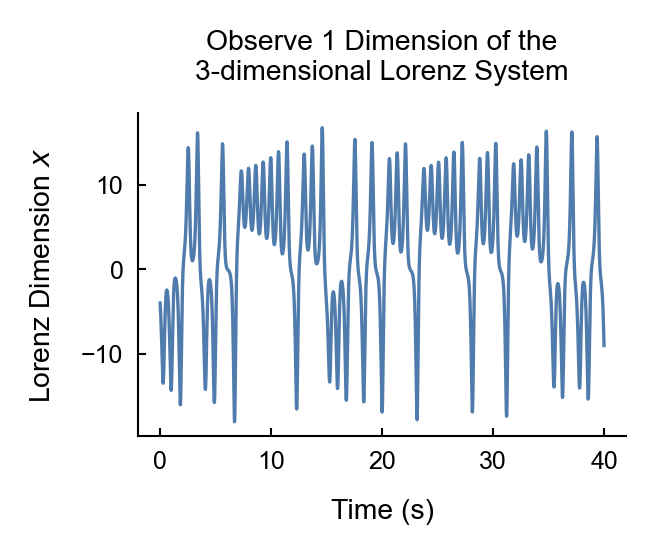

In [10]:
# scale = 2
# signal_length = 2000
# plt.figure(figsize=(5*scale, 3*scale))
# plt.plot(np.arange(signal_length)*dt, signal[:signal_length, 0], linewidth=4)
# ax = plt.gca()
# ax.spines[['right', 'top', 'bottom', 'left']].set_visible(False)
# ax.xaxis.set_ticks_position('bottom')
# ax.tick_params(axis='y', which='both', left=True, right=False)
# ax.set_xticks([])
# ax.set_yticks([])
# # ax.set_xlabel('Time (s)', fontsize=16*scale)
# # ax.set_ylabel('Lorenz Dimension $x$', fontsize=16*scale)
# ax.tick_params(labelsize=15*scale)
# ax.set_title('Lorenz System Partial Observation\n(Dimension $x$)', fontsize=15*scale)
# plt.savefig(os.path.join(image_save_dir, "lorenz-observation.pdf"), bbox_inches='tight', transparent=True)
# plt.show()

signal_length = 4000
plot_width = 0.8
color = '#4F7CAC'
labelsize = 6.8
titlesize = 6.8

fig = plt.figure(figsize=(2.1, 1.4))
plt.plot(np.arange(signal_length)*dt, signal[:signal_length, 0], c=color, linewidth=plot_width)
ax = plt.gca()
ax.set_xlabel('Time (s)', fontsize=labelsize)
ax.set_ylabel('Lorenz Dimension $x$', fontsize=labelsize)
ax.set_title('Observe 1 Dimension of the\n3-dimensional Lorenz System', fontsize=titlesize)
plt.savefig(os.path.join(image_save_dir, "lorenz-observation.pdf"), bbox_inches='tight', transparent=True)

bbox = fig.get_tightbbox(fig.canvas.get_renderer())
# Calculate width and height of the bounding box in inches
width_inches = (bbox.x1 - bbox.x0)
height_inches = (bbox.y1 - bbox.y0)
print(width_inches, height_inches)

plt.show()

In [11]:
delase = DeLASE(signal[:signal_length, [0]], dt=dt, n_delays=5)
delase.fit(dt=dt)

None None


2.156527777777778 1.6519722222222226


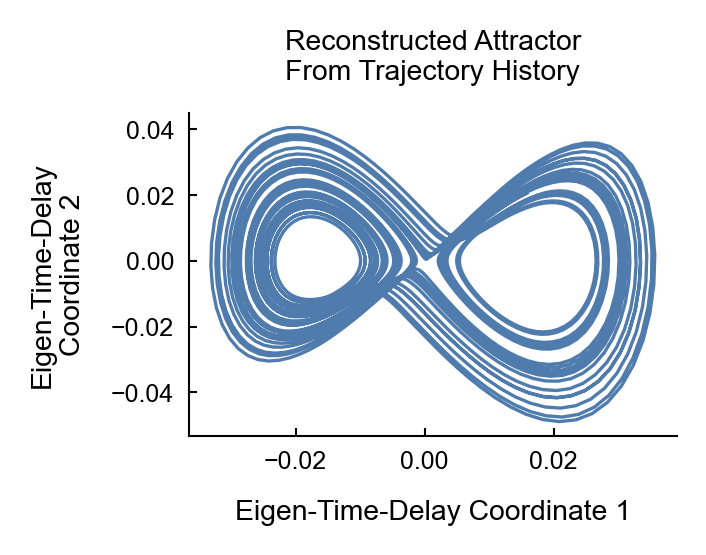

In [13]:
# plt.figure(figsize=(5*scale, 3*scale))
# plt.plot(delase.DMD.V[:, 0], delase.DMD.V[:, 1], linewidth=4)
# ax = plt.gca()
# ax.spines[['right', 'top', 'bottom', 'left']].set_visible(False)
# ax.set_xticks([])
# ax.set_yticks([])
# ax.xaxis.set_ticks_position('bottom')
# ax.tick_params(axis='y', which='both', left=True, right=False)
# # ax.set_xlabel('Eigen-Time-Delay Coordinate 1', fontsize=16*scale)
# # ax.set_ylabel('Eigen-Time-Delay\nCoordinate 2', fontsize=16*scale)
# ax.tick_params(labelsize=14*scale)
# ax.set_title('Lorenz System\nRepresentation in Eigen-Time-Delay Coordinates', fontsize=15*scale)
# plt.savefig(os.path.join(image_save_dir, "lorenz-attractor.pdf"), bbox_inches='tight', transparent=True)
# plt.show()

fig = plt.figure(figsize=(2.1, 1.4))
plt.plot(delase.DMD.V[:, 0], delase.DMD.V[:, 1], linewidth=plot_width, c=color)
ax = plt.gca()
ax.set_xlabel('Eigen-Time-Delay Coordinate 1', fontsize=labelsize)
ax.set_ylabel('Eigen-Time-Delay\nCoordinate 2', fontsize=labelsize)
ax.set_title('Reconstructed Attractor\nFrom Trajectory History', fontsize=titlesize)
plt.savefig(os.path.join(image_save_dir, "lorenz-attractor.pdf"), bbox_inches='tight', transparent=True)

bbox = fig.get_tightbbox(fig.canvas.get_renderer())
# Calculate width and height of the bounding box in inches
width_inches = (bbox.x1 - bbox.x0)
height_inches = (bbox.y1 - bbox.y0)
print(width_inches, height_inches)

plt.show()

In [14]:
def vdp(x, t, mu):
    dx = np.zeros(2)
    dx[0] = x[1]
    dx[1] = mu*(1 - x[0]**2)*x[1] - x[0]
    return dx

In [33]:
np.random.seed(41)
t_span = [0, 400]
dt = 0.02
t_eval = np.arange(t_span[0], t_span[1], dt)
# y0 = [-1, 1]
sol = solve_ivp(lambda t, x: vdp(x, t, mu=2), y0=np.random.randn(2), t_eval=t_eval, t_span=t_span)

In [34]:
delase = DeLASE(sol.y.T[5000:15000, [1]], n_delays=500)

In [35]:
sol.y.T.shape

(20000, 2)

In [36]:
delase.DMD.fit()

In [37]:
pred = delase.DMD.predict(sol.y.T[15000:, [1]], reseed=sol.y.T[15000:, [1]].shape[0])

3.4024583333333345 2.1803888888888885


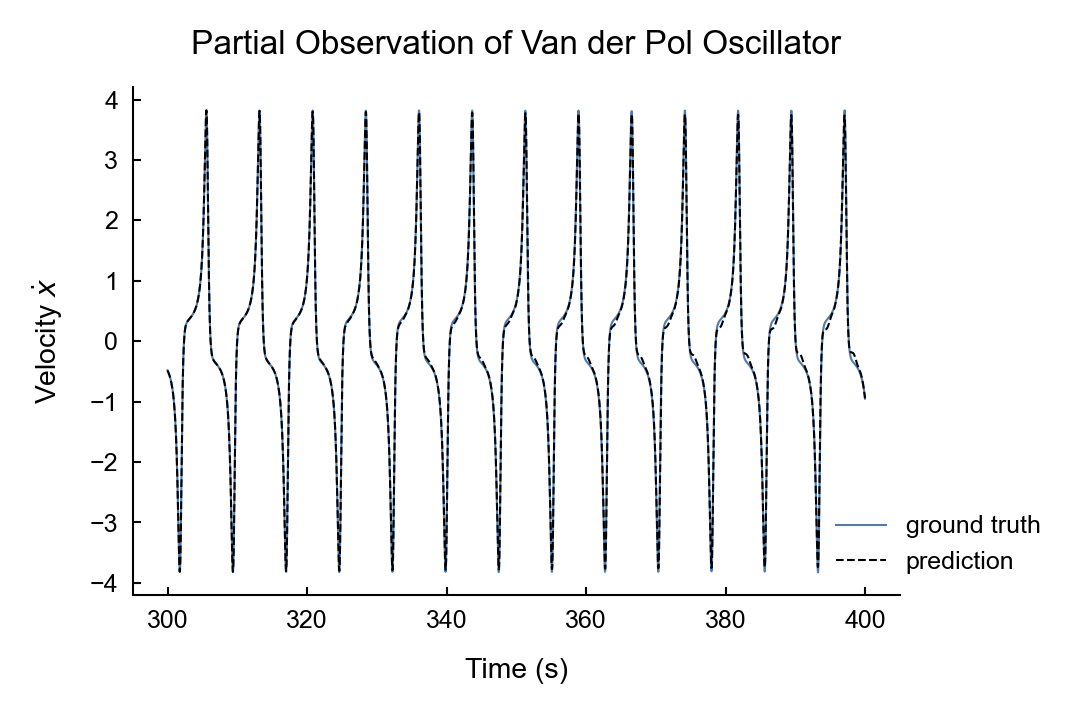

In [40]:
plot_length = 5000
fig = plt.figure(figsize=(3.3, 2.2))
plt.plot(t_eval[15000:15000 + plot_length], sol.y.T[15000:15000 + plot_length, 1], c=color, label='ground truth')
plt.plot(t_eval[15000:15000 + plot_length], pred[:plot_length, 0], c='k', label='prediction', linestyle='--')
plt.plot()
plt.xlabel('Time (s)', fontsize=labelsize)
plt.ylabel('Velocity $\dot{x}$', fontsize=labelsize)
plt.title('Partial Observation of Van der Pol Oscillator', fontsize=8)
plt.legend(bbox_to_anchor=(1.05, 0.1), loc='center', ncol=1)
plt.savefig(os.path.join(image_save_dir, "vdp.pdf"), bbox_inches='tight', transparent=True)

bbox = fig.get_tightbbox(fig.canvas.get_renderer())
# Calculate width and height of the bounding box in inches
width_inches = (bbox.x1 - bbox.x0)
height_inches = (bbox.y1 - bbox.y0)
print(width_inches, height_inches)

plt.show()